In [88]:
import pandas as pd
df = pd.read_csv('Arrival_weather_combined.csv', index_col = 0)

df = df.fillna(0)

In [89]:
df['Wind Speed Normalized'] = (df['Wind Speed [in knots]'] - df['Wind Speed [in knots]'].mean()) / (df['Wind Speed [in knots]'].max() - df['Wind Speed [in knots]'].min())
df['Wind Gust Normalized'] = (df['Wind Gust [in knots]'] - df['Wind Gust [in knots]'].mean()) / (df['Wind Gust [in knots]'].max() - df['Wind Gust [in knots]'].min())
df['Pressure Normalized'] = (df['Pressure altimeter [in inches]'] - df['Pressure altimeter [in inches]'].mean()) / (df['Pressure altimeter [in inches]'].max() - df['Pressure altimeter [in inches]'].min())
df['Visibility Normalized'] = (df['Visibility [in miles]'] - df['Visibility [in miles]'].mean()) / (df['Visibility [in miles]'].max() - df['Visibility [in miles]'].min())

df['Sky Coverage Average'] = df[['Sky Level 1 Coverage', 'Sky Level 2 Coverage', 'Sky Level 3 Coverage', 'Sky Level 4 Coverage']].mean(axis=1)
df['Sky Coverage Normalized'] = (df['Sky Coverage Average'] - df['Sky Coverage Average'].mean()) / (df['Sky Coverage Average'].max() - df['Sky Coverage Average'].min())


#weights
weights = {
    'Wind Speed': 0.8 / 2.2,
    'Wind Gust': 0.8 / 2.2,
    'Pressure Altimeter': 0.2 / 2.2,
    'Visibility': 0.2 / 2.2,
    'Sky Coverage': 0.2 / 2.2
}

#weather score
df['weather_score'] = (
    df['Wind Speed Normalized'] * weights['Wind Speed'] +
    df['Wind Gust Normalized'] * weights['Wind Gust'] +
    df['Pressure Normalized'] * weights['Pressure Altimeter'] +
    df['Visibility Normalized'] * weights['Visibility'] +
    df['Sky Coverage Normalized'] * weights['Sky Coverage']
)

#Categorize by weather score
def categorize_weather_by_score(score):
    if score <= 0.1:
        return 'Very Bad'
    elif score <= 0.2:
        return 'Bad'
    elif score <= 0.3:
        return 'Moderate'
    elif score <= 0.5:
        return 'Good'
    else:
        return 'Very Good'

df['weather_category'] = df['weather_score'].apply(categorize_weather_by_score)



C:\Users\samue\AppData\Local\Temp\ipykernel_38624\1622596532.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='weather_category', y='actual_delay', data=df, jitter=True, palette='coolwarm', size=5)


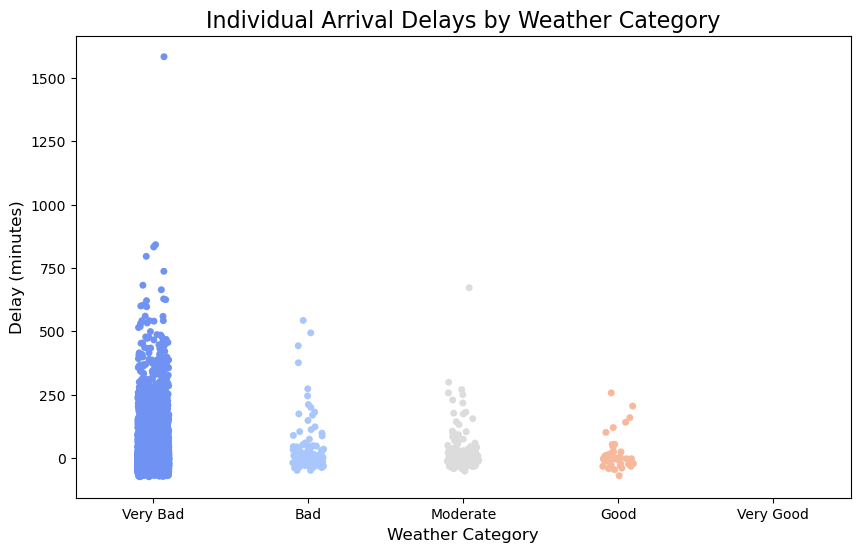

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

category_order = ['Very Bad', 'Bad', 'Moderate', 'Good', 'Very Good']
df['weather_category'] = pd.Categorical(df['weather_category'], categories=category_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.stripplot(x='weather_category', y='actual_delay', data=df, jitter=True, palette='coolwarm', size=5)

plt.title('Individual Arrival Delays by Weather Category', fontsize=16)
plt.xlabel('Weather Category', fontsize=12)
plt.ylabel('Delay (minutes)', fontsize=12)

plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_38624\2583627359.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='weather_category', y='actual_delay', data=df, palette='coolwarm')


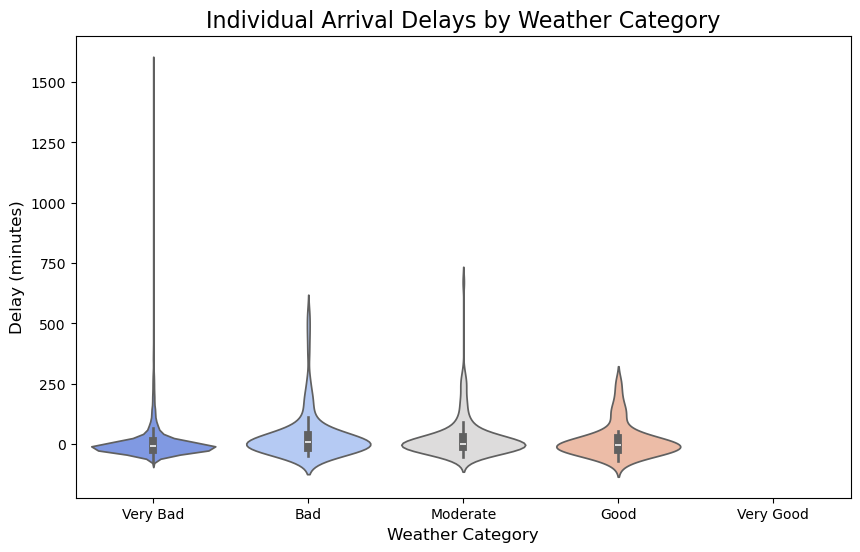

In [91]:
category_order = ['Very Bad', 'Bad', 'Moderate', 'Good', 'Very Good']
df['weather_category'] = pd.Categorical(df['weather_category'], categories=category_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.violinplot(x='weather_category', y='actual_delay', data=df, palette='coolwarm')

plt.title('Individual Arrival Delays by Weather Category', fontsize=16)
plt.xlabel('Weather Category', fontsize=12)
plt.ylabel('Delay (minutes)', fontsize=12)

plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_38624\1010724704.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay_by_weather = df.groupby('weather_category')['actual_delay'].mean().reset_index()
C:\Users\samue\AppData\Local\Temp\ipykernel_38624\1010724704.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_category', y='actual_delay', data=avg_delay_by_weather, palette='coolwarm')


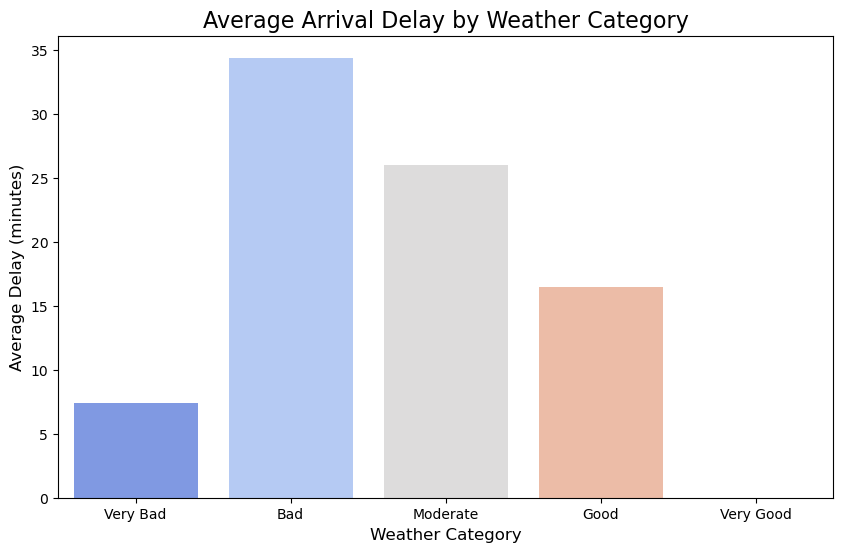

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_delay_by_weather = df.groupby('weather_category')['actual_delay'].mean().reset_index()

avg_delay_by_weather = avg_delay_by_weather.sort_values(by='actual_delay', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='weather_category', y='actual_delay', data=avg_delay_by_weather, palette='coolwarm')

plt.title('Average Arrival Delay by Weather Category', fontsize=16)
plt.xlabel('Weather Category', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.show()
